Github:https://tgirmay.github.io/

# Intro to Data Science Fall 2019 Final Project
Project by: Thomas Girmay 

Over the years, many people have claimed that the number of violent crimes in the United States has been a result of the increase in violent video games. Over the last couple decades, many news outlets headline articles about a criminal who committed a very violent crime being "obsessed with violent videogames" and that being the reason for thier actions. Other studues have been conducted to find see if playing violent video games and violent behavoiours or correlations between the two.
This debate has devolved into some groups blaming video games as a whole and not just the violent genres. Though there have been many studies and papers published disproving this thought, many people still beleive a correlation exists.This tutorial aims to see how the number of violent crimes compares with the sales of violent video games. If the rise of these games cause violence, there should be a significant correlation between the two.

I will be using the [Video Game Sales dataset](https://www.kaggle.com/umeshnarayanappa/explore-video-games-sales/data) found on Kaggle and view the data on sales of games of the genre "Shooter", for this is considered by many as the most violent genre because games in this category depict the player or other people doing these violent crimes. I will compare this dataset with the [State Crime](https://think.cs.vt.edu/corgis/csv/state_crime/) Dataset fron the CORGIS Dataset Project. 





# Crimes Data
First, Lets import the states crimes csv file into a bandas dataset and only select the columns we need: Year, State, Violent Crime Rate. Then, lets calculate the total number of violent crimes per year and store this data in a new dataframe.

In [1]:
import pandas as pd
import glob
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

crimesDf =  pd.read_csv(".\state_crime.csv")
crimesDf = crimesDf[[ "Year", "State","Data.Rates.Violent.All"]]
display(crimesDf.head())
#Grab the unique years and store them
years = crimesDf["Year"].unique()
crimePerYear = {}

#initialize all values for the years in the dict to 0
for year in years:
    crimePerYear[year] = 0
    
#for each year, iterate through the dataset and add the number of violent crimes per state to the count for the year
for year in years:
    for index, row in crimesDf.iterrows():
        if row["Year"] == year:
            crimePerYear[year] += row["Data.Rates.Violent.All"]

,Year,State,Data.Rates.Violent.All
0,1960,Alabama,186.6
1,1961,Alabama,168.5
2,1962,Alabama,157.3
3,1963,Alabama,182.7
4,1964,Alabama,213.1


,Total_Crimes
1960,5904.2
1961,5802.6
1962,5889.9
1963,6212.3
1964,7552.7


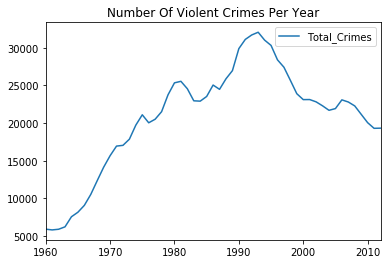

In [2]:
crimesOverYearsDf = pd.Series(crimePerYear, name ='Total_Crimes').to_frame()

display(crimesOverYearsDf.head())
crimesOverYearsDf.plot.line(title = "Number Of Violent Crimes Per Year")

We now have a table and line graph of the number of violent crimes in the US over time. Next, lets process our game sale data.

# Games Data 

Like before, Let's edit our dataframe to only include the data we need. Lets grab the Sales, Genre, and Year columns and total the sales by year.

In [3]:
gamesDf = pd.read_csv(".\gamesales.csv")
genres = gamesDf["Genre"].unique()
years = gamesDf["Year"].unique()

salesPerGenreOverYears = {}

for genre in genres:
    for year in years:
        salesPerGenreOverYears[year,genre] = 0
    
for index, row in gamesDf.iterrows():
    if((row["Year"] in years) & (row["Genre"] in genres)):
        salesPerGenreOverYears[row["Year"],row["Genre"]] += row["NA_Sales"]
#Sales are in Millions

Now that we have calculated the number of sales by year and genre, let us look at our current dataframe.

In [4]:
#store data set by genre in df
genreSalesDf = pd.Series(salesPerGenreOverYears, name ='Sales').to_frame()
genreSalesDf.head()

,,Sales
2006.0,Sports,72.91
1985.0,Sports,0.18
2008.0,Sports,48.92
2009.0,Sports,71.47
1996.0,Sports,7.78


Since our dictionary had two keys, the resulting dataframe has two indices. To make the processing easier, lets get rid of this and add some column names.

In [5]:
#remove the double indexing
genreSalesDf.reset_index(level = 0, inplace = True )
genreSalesDf.reset_index(level = 0, inplace = True )
genreSalesDf.columns = ["Genre", "Year", "Sales_in_Millions"]
genreSalesDf.head()

,Genre,Year,Sales_in_Millions
0,Sports,2006.0,72.91
1,Sports,1985.0,0.18
2,Sports,2008.0,48.92
3,Sports,2009.0,71.47
4,Sports,1996.0,7.78


Now we can calculate the number of sales of shooters over the years in a similar manner as we did with the violent crimes. 

In [6]:
shooterSalesDf = pd.DataFrame()

year = []
sales = []
for index, row in genreSalesDf.iterrows():
    if(row["Genre"]=="Shooter"):
        year.append(row["Year"])
        sales.append(row["Sales_in_Millions"])


shooterSalesDf["Year"] = year
shooterSalesDf["Sales_in_Millions"] = sales

shooterSalesDf =shooterSalesDf.set_index("Year").sort_index()
shooterSalesDf.head()

,Sales_in_Millions
Year,
1980.0,6.56
1981.0,9.37
1982.0,3.55
1983.0,0.45
1984.0,27.79


# Analysis

Now let's plot our results and see how it looks so far. We also need to constrict our plot to only include ranges that exist in both frames.

(1980, 2010)

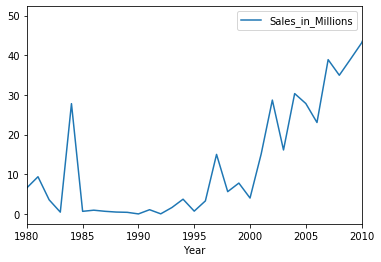

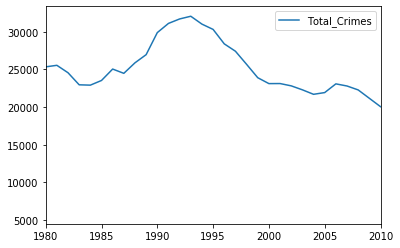

In [7]:
ax=shooterSalesDf.plot.line()
ax.set_xlim(1980,2010)

ay = crimesOverYearsDf.plot.line()
ay.set_xlim(1980,2010)

So that we can compare these values, lets normalize both data sets and plot them on the same graph

Text(0.5, 1.0, 'Normalized Crime and Shooter Sales Over Years 1980-2010')

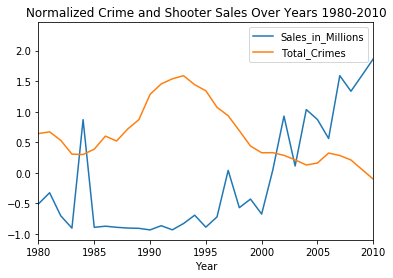

In [8]:
normalizedCrimeDf = (crimesOverYearsDf -crimesOverYearsDf.mean())/crimesOverYearsDf.std()
normalizedShootersDf = (shooterSalesDf -shooterSalesDf.mean())/shooterSalesDf.std()

combinedNormalizedStatsDf = normalizedShootersDf
combinedNormalizedStatsDf["Total_Crimes"] = normalizedCrimeDf["Total_Crimes"]
ax=combinedNormalizedStatsDf.plot.line()
ax.set_xlim(1980,2010)
ax.set_title("Normalized Crime and Shooter Sales Over Years 1980-2010")


Now, lets setup a scatterplot of The number of violent crimes over the number of sales of violent games

p Value = 1.2322415954974091e-06
r Value = -0.7329335260479976


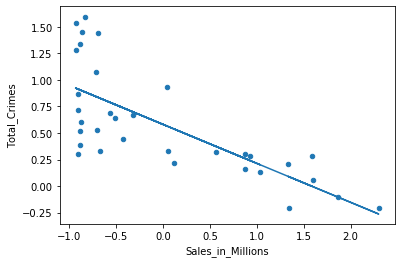

In [9]:
combinedNormalizedStatsDf =combinedNormalizedStatsDf.reset_index()

combinedNormalizedStatsDf=combinedNormalizedStatsDf[combinedNormalizedStatsDf["Year"]<2013]
combinedNormalizedStatsDf.set_index("Year")
slope, intercept, r_value, p_value, std_err = stats.linregress(combinedNormalizedStatsDf["Sales_in_Millions"],combinedNormalizedStatsDf["Total_Crimes"])
line = slope*combinedNormalizedStatsDf["Sales_in_Millions"]+intercept
combinedNormalizedStatsDf.plot.scatter(x="Sales_in_Millions", y="Total_Crimes")
plt.plot(combinedNormalizedStatsDf["Sales_in_Millions"], line)

print("p Value =", p_value)
print("r Value =", r_value)

From the scatterplot, we can actually see that there is actually a relativley high negative correlation between them!